In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [10]:
class Perceptron:
    def __init__(self, learning_rate=0.1, max_epochs=10):
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.w = None
        self.b = None
        self.boundaries = []  # store decision boundaries for visualization

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                if target * (np.dot(xi, self.w) + self.b) <= 0:
                    self.w += self.lr * target * xi
                    self.b += self.lr * target
                    errors += 1
                    # Store boundary line (slope, intercept)
                    slope = -self.w[0] / self.w[1] if self.w[1] != 0 else 0
                    intercept = -self.b / self.w[1] if self.w[1] != 0 else 0
                    self.boundaries.append((slope, intercept))
            if errors == 0:
                break

    def predict(self, X):
        return np.where(np.dot(X, self.w) + self.b >= 0, 1, -1)


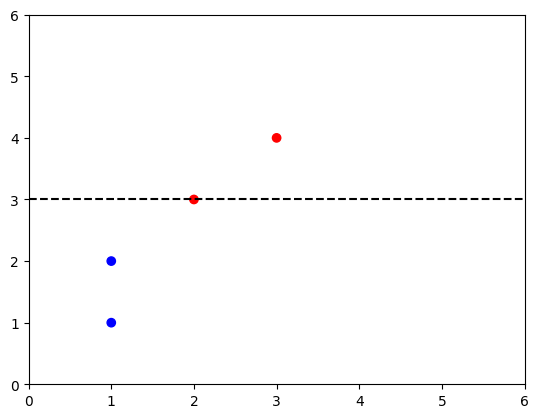

In [14]:
# Example dataset (linearly separable)
X = np.array([[1, 1],
              [1, 2],
              [2, 3],
              [3, 4]])
y = np.array([-1, -1, 1, 1])  # 1 = red, -1 = blue

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, max_epochs=10)
perceptron.fit(X, y)

# Visualization setup
fig, ax = plt.subplots()
colors = ['red' if label == 1 else 'blue' for label in y]
ax.scatter(X[:, 0], X[:, 1], c=colors)

line, = ax.plot([], [], 'k--')

def init():
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    return line,

def update(frame):
    slope, intercept = perceptron.boundaries[frame]
    x_vals = np.array(ax.get_xlim())
    y_vals = slope * x_vals + intercept
    line.set_data(x_vals, y_vals)
    return line,

ani = FuncAnimation(fig, update, frames=len(perceptron.boundaries),
                    init_func=init, blit=True, repeat=False)

HTML(ani.to_jshtml())